# Open-Pit Mine Problem


***

# Dataset Zuck_small
### Blocks file

In [3]:
import pandas as pd

Zuck_small = "C:/Users/Deivid/Downloads/Notebooks, caixote, indíces/Notebook Zuck_small(Concluido)/zuck_small.blocks/zuck_small.caixote.csv"

blockmodel = pd.read_csv(Zuck_small, sep=',')

blockmodel['id'] = range(1, len(blockmodel) + 1)
blockmodel['blockvalue'] = blockmodel['value'] - blockmodel['cost']
blockmodel = blockmodel.rename(columns={'x': 'xi', 'y': 'yi', 'z': 'zi'})

blockmodel

,xi,yi,zi,cost,value,rock_tonnes,ore_tonnes,id,blockvalue
0,0,0,0,0.0,0.0,0.0,0.0,1,0.0
1,0,0,1,0.0,0.0,0.0,0.0,2,0.0
2,0,0,2,0.0,0.0,0.0,0.0,3,0.0
3,0,0,3,0.0,0.0,0.0,0.0,4,0.0
4,0,0,4,0.0,0.0,0.0,0.0,5,0.0
...,...,...,...,...,...,...,...,...,...
24552,38,42,10,0.0,0.0,0.0,0.0,24553,0.0
24553,38,42,11,0.0,0.0,0.0,0.0,24554,0.0
24554,38,42,12,0.0,0.0,0.0,0.0,24555,0.0
24555,38,42,13,0.0,0.0,0.0,0.0,24556,0.0


### Conversão Coordenada Índice

In [4]:
def coord2index(df, O, D, cols=['xi', 'yi', 'zi']):
    data = [D[i]*(df[cols].iloc[:, i] - 0.5) + O[i] for i in range(3)]
    return pd.DataFrame(data, index = ['x', 'y', 'z']).T

D = [30, 30, 30]  
O = [0, 0, 0]           

dados_em_index = coord2index(blockmodel, O, D)
blockmodel  = pd.concat([dados_em_index, blockmodel], axis = 1).round(2)

colunas_ordenadas = ['id','x', 'y', 'z', 'xi', 'yi', 'zi','value', 'cost','blockvalue', 'rock_tonnes', 'ore_tonnes']
blockmodel = blockmodel[colunas_ordenadas]

blockmodel.to_csv("Zuck_small.blocks.csv", index=False)

blockmodel

,id,x,y,z,xi,yi,zi,value,cost,blockvalue,rock_tonnes,ore_tonnes
0,1,-15.0,-15.0,-15.0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,2,-15.0,-15.0,15.0,0,0,1,0.0,0.0,0.0,0.0,0.0
2,3,-15.0,-15.0,45.0,0,0,2,0.0,0.0,0.0,0.0,0.0
3,4,-15.0,-15.0,75.0,0,0,3,0.0,0.0,0.0,0.0,0.0
4,5,-15.0,-15.0,105.0,0,0,4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,1125.0,1245.0,285.0,38,42,10,0.0,0.0,0.0,0.0,0.0
24553,24554,1125.0,1245.0,315.0,38,42,11,0.0,0.0,0.0,0.0,0.0
24554,24555,1125.0,1245.0,345.0,38,42,12,0.0,0.0,0.0,0.0,0.0
24555,24556,1125.0,1245.0,375.0,38,42,13,0.0,0.0,0.0,0.0,0.0


### Plotting the content graph caixote

Output()

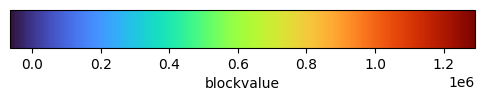

In [20]:
import numpy as np
import pandas as pd
import k3d
import matplotlib.pyplot as plt

# Filtra blocos com valor válido
df_filtrado = blockmodel.dropna(subset=['blockvalue'])

# Usa os índices discretos (xi, yi, zi)
nx = df_filtrado['xi'].max() + 1
ny = df_filtrado['yi'].max() + 1
nz = df_filtrado['zi'].max() + 1

# Cria o grid e a máscara
grid = np.zeros((nx, ny, nz), dtype=np.float32)
mask = np.zeros((nx, ny, nz), dtype=bool)

# Preenche o grid com os valores de blockvalue
for _, row in df_filtrado.iterrows():
    xi, yi, zi = int(row['xi']), int(row['yi']), int(row['zi'])
    grid[xi, yi, zi] = row['blockvalue']
    mask[xi, yi, zi] = True

# Normaliza os valores para 0–255
min_val = df_filtrado['blockvalue'].min()
max_val = df_filtrado['blockvalue'].max()
df_filtrado['color_index'] = ((df_filtrado['blockvalue'] - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Paleta Turbo
def turbo_palette():
    cmap = plt.get_cmap('turbo')
    return [int('0x' + ''.join(f'{int(c*255):02x}' for c in cmap(i/255)[:3]), 16) for i in range(256)]

colors = turbo_palette()

# Adiciona cor hexadecimal ao DataFrame
df_filtrado['color_hex'] = df_filtrado['color_index'].apply(lambda i: f'#{colors[i]:06x}')

# Preenche o grid com os índices de cor
color_grid = np.zeros((nx, ny, nz), dtype=np.uint8)
for _, row in df_filtrado.iterrows():
    xi, yi, zi = int(row['xi']), int(row['yi']), int(row['zi'])
    color_grid[xi, yi, zi] = row['color_index']

# Corrige orientação para K3D: (z, y, x)
color_grid = np.transpose(color_grid, (2, 1, 0))
mask = np.transpose(mask, (2, 1, 0))

# Aplica máscara: só mostra blocos válidos
color_grid_masked = np.where(mask, color_grid, 0)

# Cria o plot interativo com legenda textual
plot = k3d.plot()
voxel_obj = k3d.voxels(color_grid_masked, color_map=colors, outlines=True)
plot += voxel_obj
label = k3d.text2d(f'blockvalue: {min_val:.2f} – {max_val:.2f}', position=[0.01, 0.95], color=0x000000, size=1.2)
plot += label
plot.display()

# Gera e exibe a colorbar visual com matplotlib
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = plt.get_cmap('turbo')
norm = plt.Normalize(min_val, max_val)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')
cb.set_label('blockvalue')
plt.show()


### Plotting the mineral body content graph

Output()

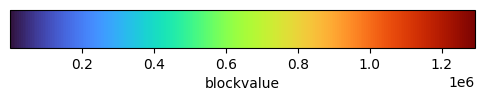

In [18]:
import numpy as np
import pandas as pd
import k3d
import matplotlib.pyplot as plt

# Filtra blocos com valor válido
df_filtrado = blockmodel[blockmodel['blockvalue'] > 0].copy()

# Usa os índices discretos (xi, yi, zi)
nx = df_filtrado['xi'].max() + 1
ny = df_filtrado['yi'].max() + 1
nz = df_filtrado['zi'].max() + 1

# Cria o grid e a máscara
grid = np.zeros((nx, ny, nz), dtype=np.float32)
mask = np.zeros((nx, ny, nz), dtype=bool)

# Preenche o grid com os valores de blockvalue
for _, row in df_filtrado.iterrows():
    xi, yi, zi = int(row['xi']), int(row['yi']), int(row['zi'])
    grid[xi, yi, zi] = row['blockvalue']
    mask[xi, yi, zi] = True

# Normaliza os valores para 0–255
min_val = df_filtrado['blockvalue'].min()
max_val = df_filtrado['blockvalue'].max()
df_filtrado['color_index'] = ((df_filtrado['blockvalue'] - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Paleta Turbo
def turbo_palette():
    cmap = plt.get_cmap('turbo')
    return [int('0x' + ''.join(f'{int(c*255):02x}' for c in cmap(i/255)[:3]), 16) for i in range(256)]

colors = turbo_palette()

# Adiciona cor hexadecimal ao DataFrame
df_filtrado['color_hex'] = df_filtrado['color_index'].apply(lambda i: f'#{colors[i]:06x}')

# Preenche o grid com os índices de cor
color_grid = np.zeros((nx, ny, nz), dtype=np.uint8)
for _, row in df_filtrado.iterrows():
    xi, yi, zi = int(row['xi']), int(row['yi']), int(row['zi'])
    color_grid[xi, yi, zi] = row['color_index']

# Corrige orientação para K3D: (z, y, x)
color_grid = np.transpose(color_grid, (2, 1, 0))
mask = np.transpose(mask, (2, 1, 0))

# Aplica máscara: só mostra blocos válidos
color_grid_masked = np.where(mask, color_grid, 0)

# Cria o plot interativo com legenda textual
plot = k3d.plot()
voxel_obj = k3d.voxels(color_grid_masked, color_map=colors, outlines=True)
plot += voxel_obj
label = k3d.text2d(f'blockvalue: {min_val:.2f} – {max_val:.2f}', position=[0.01, 0.95], color=0x000000, size=1.2)
plot += label
plot.display()

# Gera e exibe a colorbar visual com matplotlib
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = plt.get_cmap('turbo')
norm = plt.Normalize(min_val, max_val)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')
cb.set_label('blockvalue')
plt.show()
